In [3]:
# Install necessary libraries
!pip install pandas numpy matplotlib seaborn geopandas viridis

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   ------------------------- -------------- 204.8/323.6 kB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 323.6/323.6 kB 5.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.9 MB ? eta -:--:--
    --------------------------------------- 0.3/15.9 MB 7.2 MB/s eta 0:00:03
   -- ------------------------------------- 0.8/15.9 MB 10.5 MB/s eta 0:00:02
   --- ------------------------------------ 1.3/15.9 MB 10.3 MB/s eta 0:00:02
   ---- ----------------------------------- 1.9/15.9 MB 10.7 MB/s eta 0:00:02
   ----- ---------------------------------- 2.4/15.9 MB 10.9 MB/s eta 0:00:02
   ------- -------------------------------- 2.9/15.9 MB 10.9 MB/s eta 0:00:02
   -------- ------------------------------- 3.4/15.9 MB 11.0 MB/s eta 0:00:02
   --------- ------------------------------ 4.0/15.9

In [41]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from matplotlib.colors import Normalize
from matplotlib import cm
from matplotlib import pyplot as plt
from seaborn import color_palette

In [7]:
# Set working directory
os.chdir(r"C:\Users\nihar\OneDrive\Desktop\Bootcamp\SCMA 632\Assignments\A5")
print(os.getcwd())


C:\Users\nihar\OneDrive\Desktop\Bootcamp\SCMA 632\Assignments\A5


In [11]:
# Load the data
filepath = r"C:\Users\nihar\OneDrive\Desktop\Bootcamp\SCMA 632\DataSet\NSSO68.csv"
data = pd.read_csv(filepath, low_memory=False)

In [13]:
# Display dataset info
print("Dataset Information:")
print(data.shape)

Dataset Information:
(101662, 384)


In [15]:
# Filter data for Maharashtra
maharashtra_data = data[data['state'] == 27]

In [17]:
# Display the structure of the filtered data
print(maharashtra_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8043 entries, 7577 to 78739
Columns: 384 entries, slno to fv_tot
dtypes: float64(306), int64(76), object(2)
memory usage: 23.6+ MB
None


In [19]:
# Check for missing values in the subset
print("Missing Values in Subset:")
print(maharashtra_data.isnull().sum())

Missing Values in Subset:
slno              0
grp               0
Round_Centre      0
FSU_number        0
Round             0
                 ..
foodtotal_q       0
state_1           0
Region            0
fruits_df_tt_v    0
fv_tot            0
Length: 384, dtype: int64


In [21]:
# Replace missing values in all columns with their respective median values
maharashtra_data = maharashtra_data.apply(lambda x: x.fillna(x.median()) if x.isnull().sum() > 0 else x)


In [23]:
# Check for missing values after replacement
print("Missing Values After Replacement:")
print(maharashtra_data.isnull().sum())

Missing Values After Replacement:
slno              0
grp               0
Round_Centre      0
FSU_number        0
Round             0
                 ..
foodtotal_q       0
state_1           0
Region            0
fruits_df_tt_v    0
fv_tot            0
Length: 384, dtype: int64


In [27]:
# Create a lookup table for district codes and names
district_lookup = pd.DataFrame({
    'District': list(range(1, 35)),
    'District_Name': [
        "Nandurbar", "Dhule", "Jalgaon", "Buldana", "Akola", "Washim", "Amravati", "Wardha", "Nagpur",
        "Bhandara", "Gondiya", "Gadchiroli", "Chandrapur", "Yavatmal", "Nanded", "Hingoli", "Parbhani",
        "Jalna", "Aurangabad", "Nashik", "Thane", "Mumbai (Suburban)", "Raigarh", "Pune", "Ahmadnagar",
        "Bid", "Latur", "Osmanabad", "Solapur", "Satara", "Ratnagiri", "Sindhudurg", "Kolhapur", "Sangli"
    ]
})

In [29]:
# Merge the lookup table with the data to replace district codes with names
maharashtra_data = maharashtra_data.merge(district_lookup, on='District', how='left')

In [31]:
# Display the structure to verify the changes
print(maharashtra_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8043 entries, 0 to 8042
Columns: 385 entries, slno to District_Name
dtypes: float64(306), int64(76), object(3)
memory usage: 23.6+ MB
None


In [33]:
# Calculate IQR and identify outliers for foodtotal_v
Q1 = maharashtra_data['foodtotal_v'].quantile(0.25)
Q3 = maharashtra_data['foodtotal_v'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers in foodtotal_v
maharashtra_data = maharashtra_data[(maharashtra_data['foodtotal_v'] >= lower_bound) & 
                                    (maharashtra_data['foodtotal_v'] <= upper_bound)]

In [43]:
# Summarize data by district to get total consumption per district
consumption_per_district = maharashtra_data.groupby('District_Name')['foodtotal_v'].sum().reset_index()

In [45]:
# Create a custom color palette with sufficient colors
n_colors = consumption_per_district.shape[0]
colors = sns.color_palette("viridis", n_colors=n_colors)

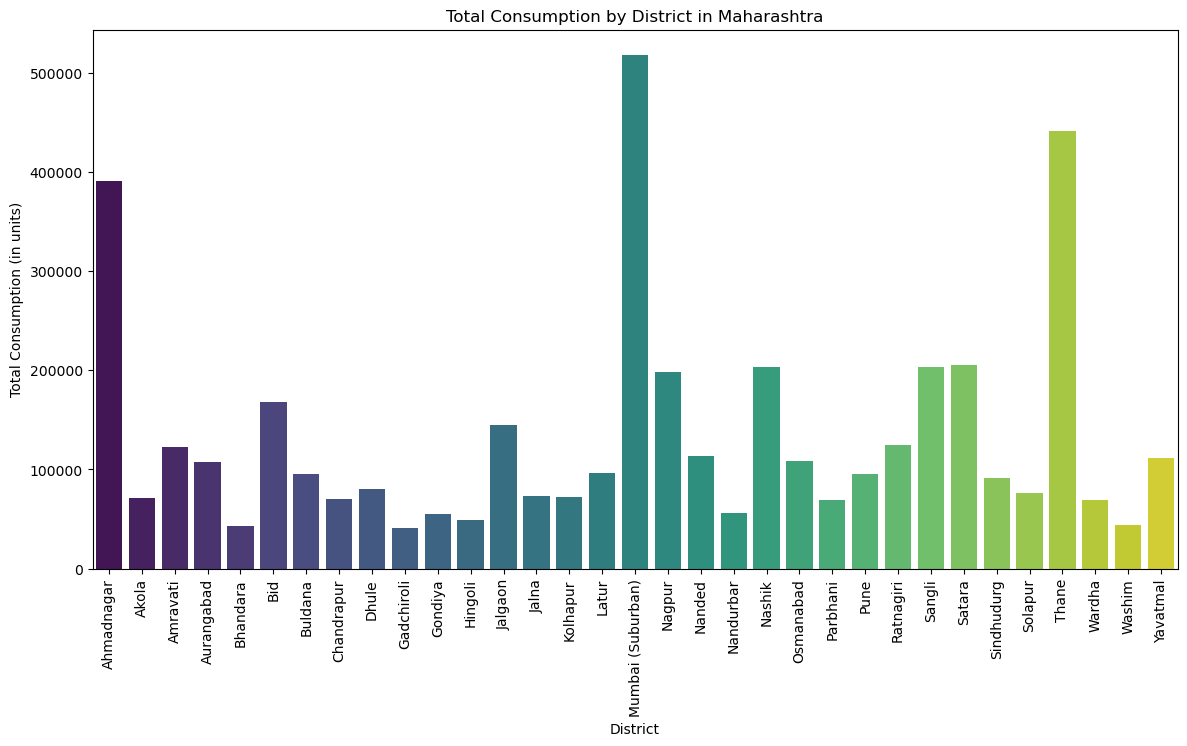

In [47]:
# Plot histogram of total consumption by district
plt.figure(figsize=(14, 7))
sns.barplot(x='District_Name', y='foodtotal_v', data=consumption_per_district, palette=colors)
plt.xticks(rotation=90)
plt.title('Total Consumption by District in Maharashtra')
plt.xlabel('District')
plt.ylabel('Total Consumption (in units)')
plt.show()

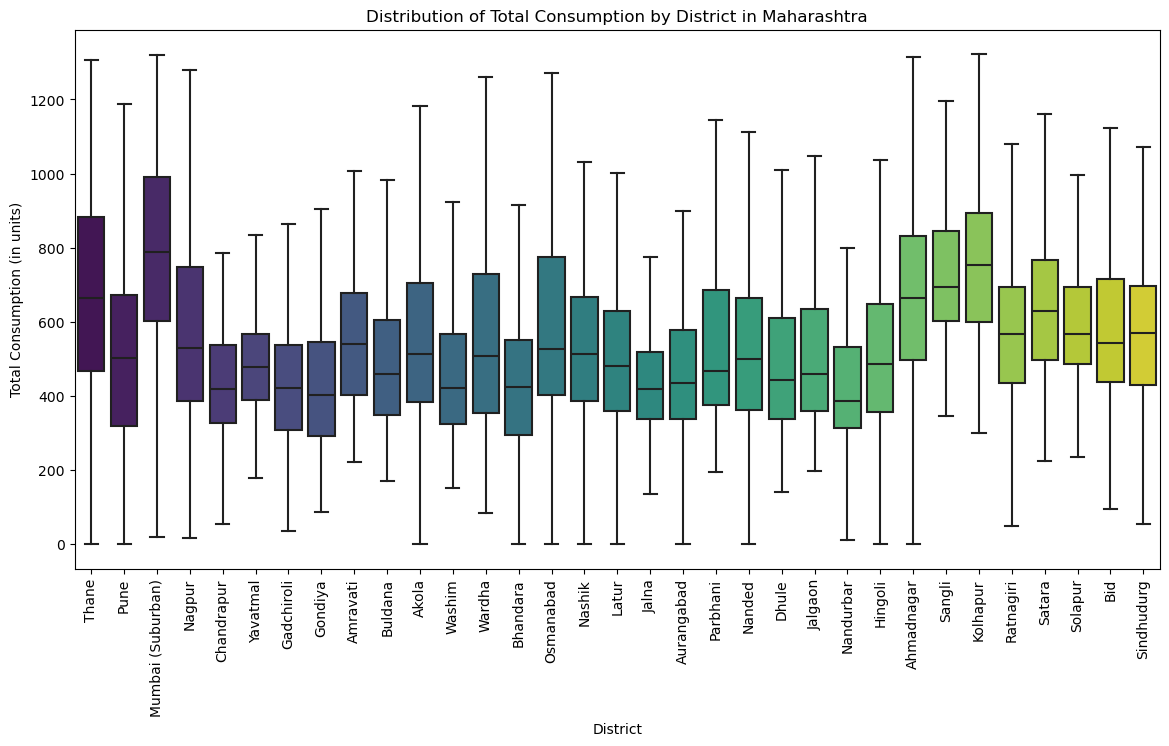

In [51]:
# Plot boxplot of total consumption by district
plt.figure(figsize=(14, 7))
sns.boxplot(x='District_Name', y='foodtotal_v', data=maharashtra_data, palette=colors, showfliers=False)
plt.xticks(rotation=90)
plt.title('Distribution of Total Consumption by District in Maharashtra')
plt.xlabel('District')
plt.ylabel('Total Consumption (in units)')
plt.show()

In [53]:
# Summarize data by district to get the values for the four variables
variables_per_district = maharashtra_data.groupby('District_Name').agg({
    'foodtotal_v': 'sum',
    'MPCE_URP': 'mean',
    'MPCE_MRP': 'mean',
    'hhdsz': 'mean'
}).reset_index()

In [55]:
# Display top and bottom 3 consuming districts
district_summary = variables_per_district.sort_values(by='foodtotal_v', ascending=False)
print("Top 3 Consuming Districts:")
print(district_summary.head(3))
print("Bottom 3 Consuming Districts:")
print(district_summary.tail(3))

Top 3 Consuming Districts:
        District_Name    foodtotal_v     MPCE_URP     MPCE_MRP     hhdsz
16  Mumbai (Suburban)  517316.433325  3700.148555  4027.635339  4.320059
29              Thane  441487.672375  2587.892679  2737.397351  4.427083
0          Ahmadnagar  390231.762025  2713.101480  2997.516684  4.112245
Bottom 3 Consuming Districts:
   District_Name   foodtotal_v     MPCE_URP     MPCE_MRP     hhdsz
31        Washim  43957.689523  1500.625000  1409.586809  5.297872
4       Bhandara  43079.481396  2133.486146  2144.591458  4.218750
9     Gadchiroli  40704.491718  1515.797660  1770.410745  3.925532


In [57]:
# Summarize consumption by region
region_summary = maharashtra_data.groupby('Sector')['foodtotal_v'].sum().reset_index()

In [59]:
# Rename sectors for readability
region_summary['Sector'] = region_summary['Sector'].apply(lambda x: 'RURAL' if x == 1 else 'URBAN')
print("Region Consumption Summary:")
print(region_summary)

Region Consumption Summary:
  Sector   foodtotal_v
0  RURAL  2.086152e+06
1  URBAN  2.479216e+06


In [63]:
# Load the shapefile for Maharashtra
shapefile_path = r"C:\Users\nihar\OneDrive\Desktop\Bootcamp\SCMA 632\Assignments\A5\Shapefiles of Maharathra\MAHARASHTRA_DISTRICTS.geojson"
maharashtra_shp = gpd.read_file(shapefile_path)

In [65]:
# Verify the geometry type of the loaded shapefile
print(maharashtra_shp.geom_type)

0          Polygon
1          Polygon
2          Polygon
3          Polygon
4          Polygon
5          Polygon
6          Polygon
7          Polygon
8          Polygon
9          Polygon
10         Polygon
11         Polygon
12         Polygon
13         Polygon
14         Polygon
15         Polygon
16         Polygon
17         Polygon
18         Polygon
19         Polygon
20         Polygon
21         Polygon
22         Polygon
23         Polygon
24         Polygon
25         Polygon
26         Polygon
27         Polygon
28    MultiPolygon
29         Polygon
30         Polygon
31         Polygon
32         Polygon
33         Polygon
34         Polygon
35         Polygon
dtype: object


In [67]:
# Print column names of the shapefile
print(maharashtra_shp.columns)

Index(['dtname', 'stname', 'stcode11', 'dtcode11', 'year_stat', 'Shape_Length',
       'Shape_Area', 'OBJECTID', 'test', 'Dist_LGD', 'State_LGD', 'geometry'],
      dtype='object')


In [69]:
# The correct column for merging is "dtname" 
maharashtra_shp = maharashtra_shp.rename(columns={'dtname': 'District_Name'})

In [71]:
# Merge the shapefile with the variables data
maharashtra_map = maharashtra_shp.merge(variables_per_district, on='District_Name', how='left')


In [73]:
# Define a plotting function with tidy evaluation
def plot_variable(data, variable, title, legend_title):
    norm = Normalize(vmin=data[variable].min(), vmax=data[variable].max())
    cmap = cm.plasma
    plt.figure(figsize=(12, 8))
    data.boundary.plot(ax=plt.gca(), linewidth=1)
    data.plot(column=variable, ax=plt.gca(), legend=True,
              legend_kwds={'label': legend_title, 'orientation': "vertical"},
              cmap=cmap, norm=norm)
    plt.title(title)
    plt.axis('off')
    plt.show()

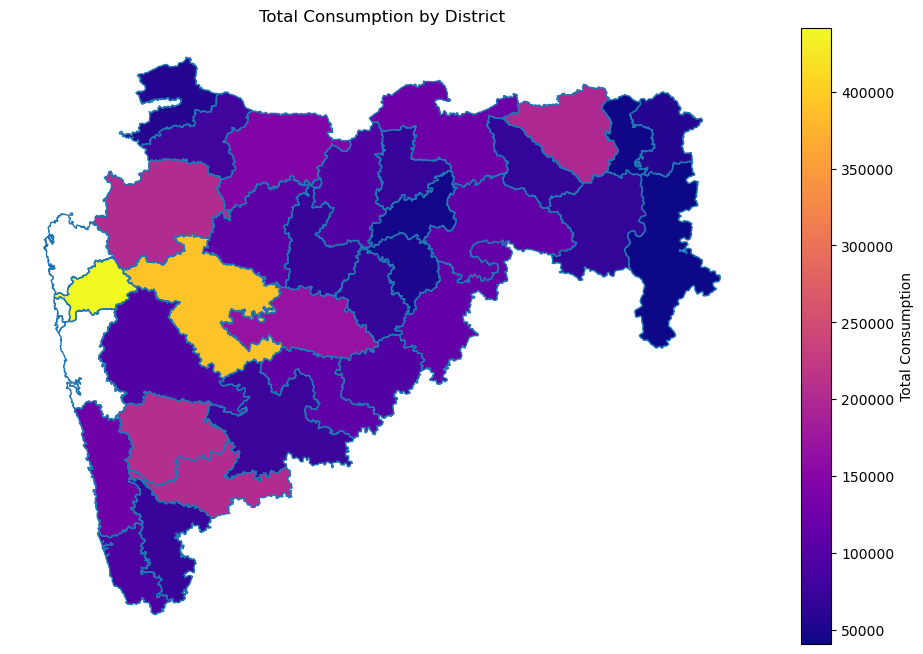

In [75]:
# Plot the maps for the variable - Total Consumption
plot_variable(maharashtra_map, 'foodtotal_v', 'Total Consumption by District', 'Total Consumption')

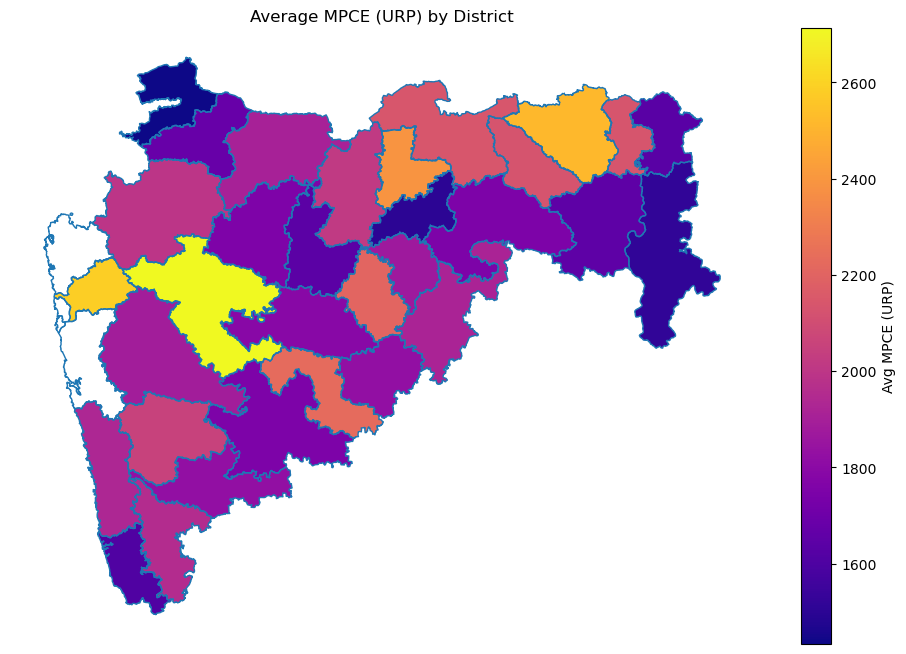

In [77]:
# Plot the maps for the variable - Average MPCE (URP)
plot_variable(maharashtra_map, 'MPCE_URP', 'Average MPCE (URP) by District', 'Avg MPCE (URP)')

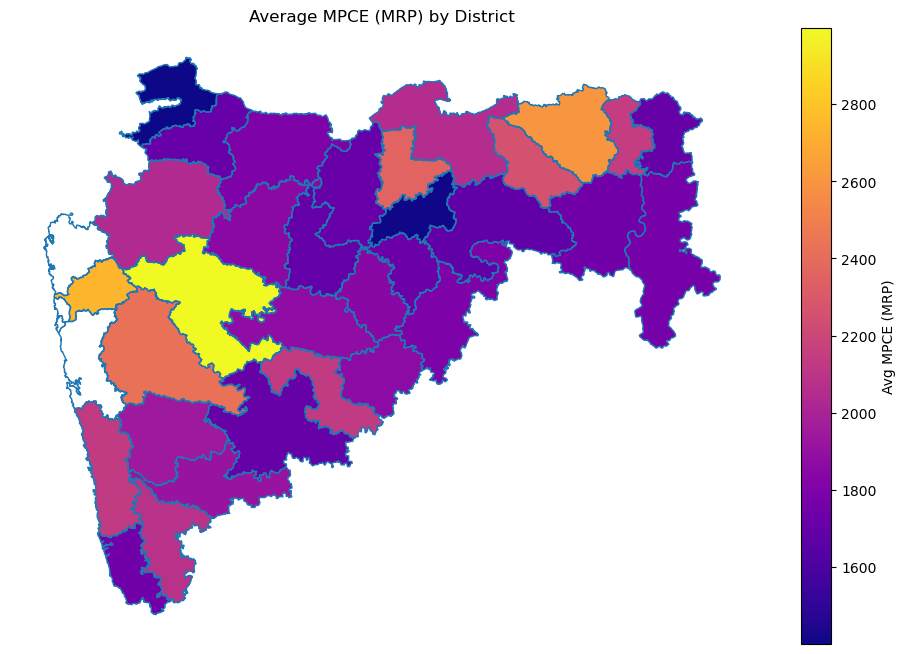

In [79]:
# Plot the maps for the variable - Average MPCE (MRP)
plot_variable(maharashtra_map, 'MPCE_MRP', 'Average MPCE (MRP) by District', 'Avg MPCE (MRP)')

In [ ]:
# Plot the maps for the variable - Avera
plot_variable(maharashtra_map, 'hhdsz', 'Average Household Size by District', 'Avg Household Size')